In [593]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

df= pd.ExcelFile("BCTC_FPT.xlsx", engine="openpyxl")
print(df.sheet_names)
df_balance = pd.read_excel(df, sheet_name="Bảng cân đối kế toán", engine="openpyxl")
df_income = pd.read_excel(df, sheet_name="Kết quả kinh doanh", engine="openpyxl")
df_cashflow = pd.read_excel(df, sheet_name="Lưu chuyển tiền tệ", engine="openpyxl")



['Bảng cân đối kế toán', 'Kết quả kinh doanh', 'Lưu chuyển tiền tệ', 'Thuyết minh']


In [594]:
years = [str(y) for y in range(2002, 2015)]
cols_to_drop = [col for col in df_income.columns if any(year in str(col).strip() for year in years)]
df_balance = df_balance.drop(columns=cols_to_drop)
print(df_balance.columns)

Index(['Chỉ tiêuVND', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', '2024'],
      dtype='object')


In [597]:
df_income = df_income.drop(columns=cols_to_drop)
print(df_income.columns)

Index(['Chỉ tiêuVND', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', '2024'],
      dtype='object')


In [599]:
df_cashflow = df_cashflow .drop(columns=cols_to_drop)
print(df_cashflow.columns)


Index(['Chỉ tiêuVND', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', '2024'],
      dtype='object')


In [601]:
print("Kiểm tra dữ liệu Bảng cân đối kế toán")
df_balance.info()

Kiểm tra dữ liệu Bảng cân đối kế toán
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chỉ tiêuVND  122 non-null    object 
 1   2015         120 non-null    float64
 2   2016         120 non-null    float64
 3   2017         120 non-null    float64
 4   2018         120 non-null    float64
 5   2019         120 non-null    float64
 6   2020         120 non-null    float64
 7   2021         120 non-null    float64
 8   2022         120 non-null    float64
 9   2023         120 non-null    float64
 10  2024         120 non-null    float64
dtypes: float64(10), object(1)
memory usage: 10.6+ KB


In [603]:
df_balance.isnull().sum()

Chỉ tiêuVND    0
2015           2
2016           2
2017           2
2018           2
2019           2
2020           2
2021           2
2022           2
2023           2
2024           2
dtype: int64

In [604]:
nan_cells = df_balance[df_balance.isnull().any(axis=1)]
print(" Các dòng trống:")
print(nan_cells)

 Các dòng trống:
                         Chỉ tiêuVND  2015  2016  2017  2018  2019  2020  \
94        Dự phòng trợ cấp thôi việc   NaN   NaN   NaN   NaN   NaN   NaN   
110           Quỹ dự phòng tài chính   NaN   NaN   NaN   NaN   NaN   NaN   

     2021  2022  2023  2024  
94    NaN   NaN   NaN   NaN  
110   NaN   NaN   NaN   NaN  


In [605]:
df_balance.duplicated().sum()

1

In [606]:
duplicates = df_balance[df_balance.duplicated()]
print("dòng bị trùng lặp hoàn toàn:")
print(duplicates)

dòng bị trùng lặp hoàn toàn:
                                        Chỉ tiêuVND  2015  2016  2017  2018  \
81       Giao dịch mua bán lại trái phiếu chính phủ   0.0   0.0   0.0   0.0   

    2019  2020  2021  2022  2023  2024  
81   0.0   0.0   0.0   0.0   0.0   0.0  


In [607]:
print("Kiểm tra dữ liệu Kết quả kinh doanh")
df_income.info()

Kiểm tra dữ liệu Kết quả kinh doanh
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chỉ tiêuVND  25 non-null     object 
 1   2015         25 non-null     float64
 2   2016         25 non-null     float64
 3   2017         25 non-null     float64
 4   2018         25 non-null     float64
 5   2019         25 non-null     float64
 6   2020         25 non-null     int64  
 7   2021         25 non-null     float64
 8   2022         25 non-null     float64
 9   2023         25 non-null     float64
 10  2024         25 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 2.3+ KB


In [608]:
df_income.isnull().sum()

Chỉ tiêuVND    0
2015           0
2016           0
2017           0
2018           0
2019           0
2020           0
2021           0
2022           0
2023           0
2024           0
dtype: int64

In [615]:
df_income.duplicated().sum()

0

In [617]:
print("Kiểm tra dữ liệu Lưu chuyển tiền tệ")
df_cashflow.info()

Kiểm tra dữ liệu Lưu chuyển tiền tệ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chỉ tiêuVND  41 non-null     object 
 1   2015         41 non-null     float64
 2   2016         41 non-null     float64
 3   2017         41 non-null     float64
 4   2018         41 non-null     float64
 5   2019         41 non-null     float64
 6   2020         41 non-null     float64
 7   2021         41 non-null     float64
 8   2022         41 non-null     int64  
 9   2023         41 non-null     float64
 10  2024         41 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 3.7+ KB


In [619]:
df_cashflow.isnull().sum()

Chỉ tiêuVND    0
2015           0
2016           0
2017           0
2018           0
2019           0
2020           0
2021           0
2022           0
2023           0
2024           0
dtype: int64

In [621]:
df_cashflow.duplicated().sum()

0

In [623]:
# Chuẩn hóa cột Chỉ tiêuVND
df_balance['ChỉtiêuVND'] = df_balance['Chỉ tiêuVND'].astype(str).str.replace(r"\s+", " ", regex=True).str.strip()
df_income['Chỉ tiêuVND'] = df_income['Chỉ tiêuVND'].astype(str).str.replace(r"\s+", " ", regex=True).str.strip()
df_cashflow['Chỉ tiêuVND'] = df_cashflow['Chỉ tiêuVND'].astype(str).str.replace(r"\s+", " ", regex=True).str.strip()


In [625]:
# Đặt Chỉ tiêuVND làm index
df_balance = df_balance.set_index("Chỉ tiêuVND")
df_income = df_income.set_index("Chỉ tiêuVND")
df_cashflow = df_cashflow.set_index("Chỉ tiêuVND")

In [627]:
# Định nghĩa years khớp với cột dữ liệu (2015-2024)
years = [str(y) for y in range(2015, 2025)]
df_balance[years] = df_balance[years].astype(float)
df_income[years] = df_income[years].astype(float)
df_cashflow[years] = df_cashflow[years].astype(float)


In [858]:
# Gắn biến cho từng giá trị để phân tích 
# Chỉ tiêu cần dùng để tính toán hiệu quả hoạt động tài chính
net_profit = df_income.loc["Lãi/(lỗ) thuần sau thuế", years]
revenue = df_income.loc["Doanh thu thuần", years]
total_assets = df_balance.loc["TỔNG CỘNG TÀI SẢN", years]  
equity = df_balance.loc["VỐN CHỦ SỞ HỮU", years]
short_term_assets = df_balance.loc["TÀI SẢN NGẮN HẠN", years]
short_term_liabilities = df_balance.loc["Nợ ngắn hạn", years]
total_liabilities = df_balance.loc["NỢ PHẢI TRẢ", years] 
long_term_debt = df_balance.loc["Nợ dài hạn", years]

# Tính các chỉ số tài chính
roa = (net_profit / total_assets)*100
roe = (net_profit / equity)*100
npm = (net_profit / revenue)*100
current_ratio = short_term_assets / short_term_liabilities
de_ratio = total_liabilities / equity

revenue_growth = revenue.pct_change()*100
revenue_growth.fillna(0, inplace=True)

net_profit_growth = net_profit.pct_change() * 100
net_profit_growth.fillna(0, inplace=True)
# Vì các chỉ tiêu nhiều nên em sẽ chia thành ba bảng cho mỗi một đích phân tích 
# Gộp thành DataFrame
df_ratios = pd.DataFrame({
    "ROA": roa,
    "ROE": roe,
    "Net Profit Margin": npm,
    "Current Ratio": current_ratio,
    "Debt to Equity": de_ratio,
    "Revenues Growth": revenue_growth,
    "Net Profit Growth":net_profit_growth,
    
}).T

# Chuyển năm thành index
df_ratios.columns = years
df_ratios = df_ratios.T
df_ratios = df_ratios.astype(float)
df_ratios_rounded = df_ratios.round(2)
# Hiển thị kết quả
print("\nKết quả các chỉ số tài chính:")
df_ratios_rounded


Kết quả các chỉ số tài chính:


,ROA,ROE,Net Profit Margin,Current Ratio,Debt to Equity,Revenues Growth,Net Profit Growth
2015,9.36,23.94,6.42,1.27,1.56,0.00,0.00
2016,8.63,22.50,6.52,1.26,1.61,4.14,5.64
2017,14.11,26.65,8.27,1.45,0.89,7.91,36.98
2018,10.87,21.89,13.93,1.27,1.01,-45.58,-8.34
2019,11.71,23.28,14.11,1.18,0.99,19.40,20.96
2020,10.60,23.78,14.83,1.13,1.24,7.63,13.09
2021,9.96,24.98,15.00,1.18,1.51,19.53,20.92
2022,12.57,25.60,14.75,1.26,1.04,23.42,21.35
2023,12.92,26.02,14.80,1.24,1.01,19.56,19.98
2024,13.09,26.39,15.00,1.31,1.02,19.44,21.05


<Figure size 3000x500 with 0 Axes>

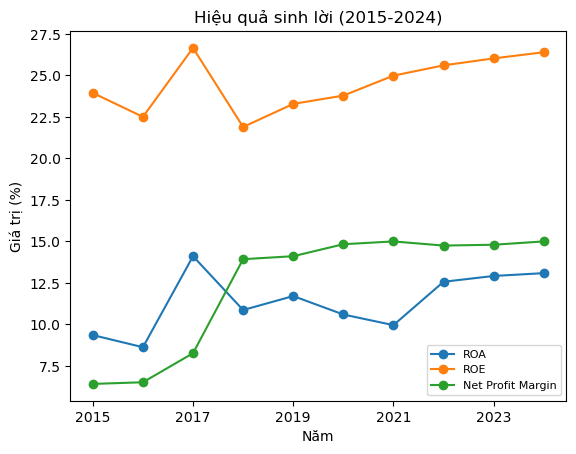

In [844]:
# 1. Biểu đồ đường ghép cho ROA, ROE, Net Profit Margin
plt.figure(figsize=(30, 5))
ax1 = df_ratios_rounded[["ROA", "ROE", "Net Profit Margin"]].plot(marker='o')
plt.xlabel("Năm")
plt.ylabel("Giá trị (%)")
plt.title("Hiệu quả sinh lời (2015-2024)")
plt.legend(["ROA", "ROE", "Net Profit Margin"], fontsize=8)
plt.show()

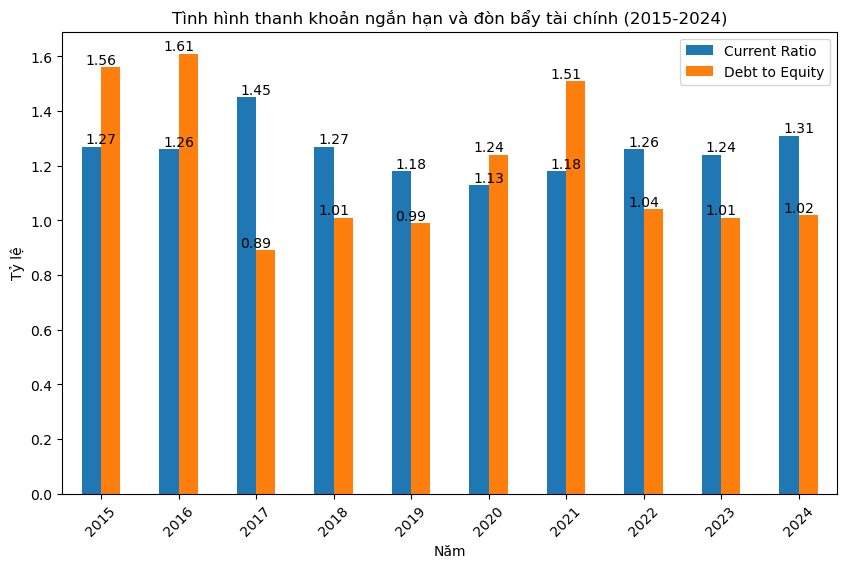

In [866]:
ax2 = df_ratios_rounded[["Current Ratio", "Debt to Equity"]].plot(kind='bar', figsize=(10, 6))
plt.xlabel("Năm")
plt.ylabel("Tỷ lệ")
plt.title("Tình hình thanh khoản ngắn hạn và đòn bẩy tài chính (2015-2024)")
plt.legend(["Current Ratio", "Debt to Equity"])
plt.xticks(rotation=45)
# plt.grid(True)  # Loại bỏ đường lưới

# Thêm nhãn giá trị trên đỉnh cột
for i in range(len(years)):
    for j, col in enumerate(["Current Ratio", "Debt to Equity"]):
        height = df_ratios_rounded[col].iloc[i]
        ax2.text(i, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

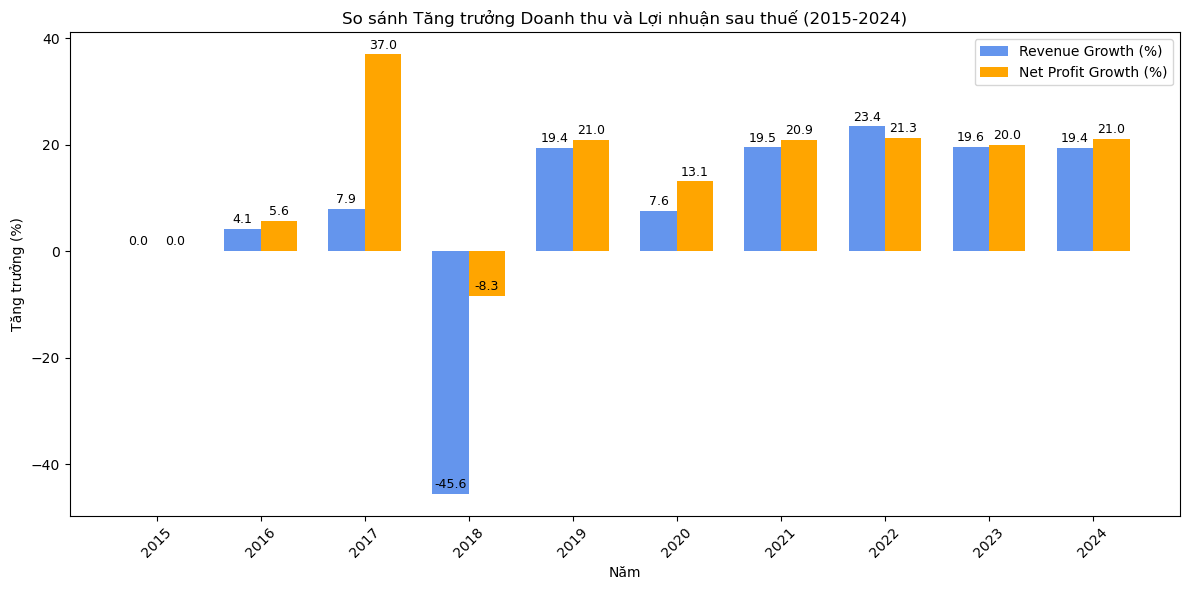

In [804]:
x = np.arange(len(years))
width = 0.35  # độ rộng mỗi cột

plt.figure(figsize=(12, 6))

bar1 = plt.bar(x - width/2, revenue_growth, width, label="Revenue Growth (%)", color="cornflowerblue")
bar2 = plt.bar(x + width/2, net_profit_growth, width, label="Net Profit Growth (%)", color="orange")

# Thêm số liệu trên cột
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height + 0.5, f'{height:.1f}', ha='center', va='bottom', fontsize=9)

for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height + 0.5, f'{height:.1f}', ha='center', va='bottom', fontsize=9)

# Cài đặt biểu đồ
plt.xticks(x, years, rotation=45)
plt.xlabel("Năm")
plt.ylabel("Tăng trưởng (%)")
plt.title("So sánh Tăng trưởng Doanh thu và Lợi nhuận sau thuế (2015-2024)")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

In [768]:

# Chỉ số cần thêm vào để phân tích cơ cấu tài sản và nguồn vốn 
# Chỉ số cơ cấu tài sản dài hạn 
lt_receivables = df_balance.loc["Phải thu dài hạn", years]
fixed_assets = df_balance.loc["Tài sản cố định", years]
long_term_investments = df_balance.loc["Đầu tư dài hạn", years]
construction_in_progress = df_balance.loc["Tài sản dở dang dài hạn", years]
other_lt_assets = df_balance.loc["Tài sản dài hạn khác", years]
long_term_assets = df_balance.loc["TÀI SẢN DÀI HẠN", years]

# Tài sản ngắn hạn
cash_equivalents = df_balance.loc["Tiền và tương đương tiền", years]
short_term_investments = df_balance.loc["Giá trị thuần đầu tư ngắn hạn", years]
receivables = df_balance.loc["Các khoản phải thu", years]
inventories = df_balance.loc["Hàng tồn kho, ròng", years]
short_term_assets = df_balance.loc["TÀI SẢN NGẮN HẠN", years]

# Tính toán các chỉ số cơ cấu tài sản và nguồn vốn 
# Tỷ trọng TS dài hạn và TS ngắn hạn so với Tổng tài sản 
lt_assets_pct = (long_term_assets / total_assets) * 100
st_assets_pct = (short_term_assets / total_assets) * 100

#  Tỷ trọng tài sản ngắn hạn
cash_pct_st = (cash_equivalents / short_term_assets) * 100
short_term_investments_pct_st = (short_term_investments / short_term_assets) * 100
receivables_pct_st = (receivables / short_term_assets) * 100
inventories_pct_st = (inventories / short_term_assets) * 100

#  tỷ trọng tài sản dài hạn
lt_receivables_pct_lt = (lt_receivables / long_term_assets) * 100
fixed_assets_pct_lt = (fixed_assets / long_term_assets) * 100
long_term_investments_pct_lt = (long_term_investments / long_term_assets) * 100
construction_in_progress_pct_lt = (construction_in_progress / long_term_assets) * 100
other_lt_assets_pct_lt = (other_lt_assets / long_term_assets) * 100

# Nguồn vốn
long_term_funding = equity + long_term_debt
funding_gap = long_term_funding - long_term_assets

# --- Tạo DataFrame kết quả ---
df_structure_refined = pd.DataFrame({
    # Tổng quan TS dài và ngắn hạn so với toàn bộ
    "LT Assets / Total Assets": lt_assets_pct,
    "ST Assets / Total Assets": st_assets_pct,

    # Phân tích TS ngắn hạn
    "Cash / ST Assets": cash_pct_st,
    "ST Investments / ST Assets": short_term_investments_pct_st,
    "Receivables / ST Assets": receivables_pct_st,
    "Inventories / ST Assets": inventories_pct_st,

    # Phân tích TS dài hạn
    "LT Receivables / LT Assets": lt_receivables_pct_lt,
    "Fixed Assets / LT Assets": fixed_assets_pct_lt,
    "LT Investments / LT Assets": long_term_investments_pct_lt,
    "Construction in Progress / LT Assets": construction_in_progress_pct_lt,
    "Other LT Assets / LT Assets": other_lt_assets_pct_lt
}).T

# Định dạng lại DataFrame
df_structure_refined.columns = years
df_structure_refined = df_structure_refined.T.astype(float).round(2)

# Hiển thị
print("\nCơ cấu chi tiết TS ngắn hạn, dài hạn theo tổng & từng nhóm:")
df_structure_refined




Cơ cấu chi tiết TS ngắn hạn, dài hạn theo tổng & từng nhóm:


,LT Assets / Total Assets,ST Assets / Total Assets,Cash / ST Assets,ST Investments / ST Assets,Receivables / ST Assets,Inventories / ST Assets,LT Receivables / LT Assets,Fixed Assets / LT Assets,LT Investments / LT Assets,Construction in Progress / LT Assets,Other LT Assets / LT Assets
2015,27.21,72.79,18.91,13.81,29.19,27.79,4.92,60.57,10.27,9.77,14.47
2016,26.56,73.44,27.45,15.85,30.31,20.79,4.81,57.92,10.43,12.88,13.96
2017,35.76,64.24,21.67,27.27,38.31,6.35,2.59,58.70,19.95,9.01,9.75
2018,38.15,61.85,21.33,30.25,34.92,7.28,0.97,57.38,19.40,10.35,11.90
2019,43.17,56.83,18.20,35.35,34.44,6.77,1.82,51.97,17.32,11.45,15.87
2020,39.46,60.54,18.55,49.22,24.80,5.11,1.47,50.51,15.67,14.41,17.93
2021,34.60,65.40,15.43,59.03,19.60,4.29,0.90,55.97,16.70,6.95,19.49
2022,40.10,59.90,20.82,42.17,27.48,6.35,1.09,58.09,15.63,5.13,20.06
2023,39.11,60.89,22.56,43.87,26.36,4.34,1.05,57.87,14.15,5.58,21.36
2024,36.76,63.24,20.46,47.84,24.99,4.08,1.25,55.99,12.54,9.67,20.55


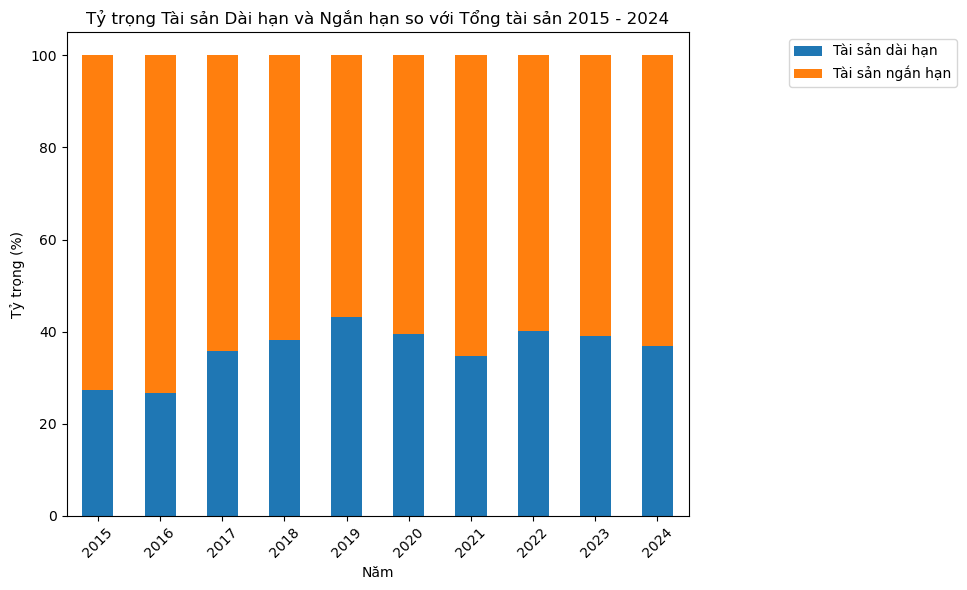

In [798]:
df_structure_refined[["LT Assets / Total Assets", "ST Assets / Total Assets"]].plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["#1f77b4", "#ff7f0e"],  # Màu sắc tùy chỉnh: xanh dương, cam
    title="Tỷ trọng Tài sản Dài hạn và Ngắn hạn so với Tổng tài sản 2015 - 2024"
)
plt.ylabel("Tỷ trọng (%)")
plt.xlabel("Năm")
plt.xticks(rotation=45)
plt.legend(["Tài sản dài hạn", "Tài sản ngắn hạn"], loc='upper left', bbox_to_anchor=(1.15, 1))  # Di chuyển chú thích ra bên ngoài
plt.grid(False)  # Tắt đường lưới
plt.tight_layout()
plt.show()

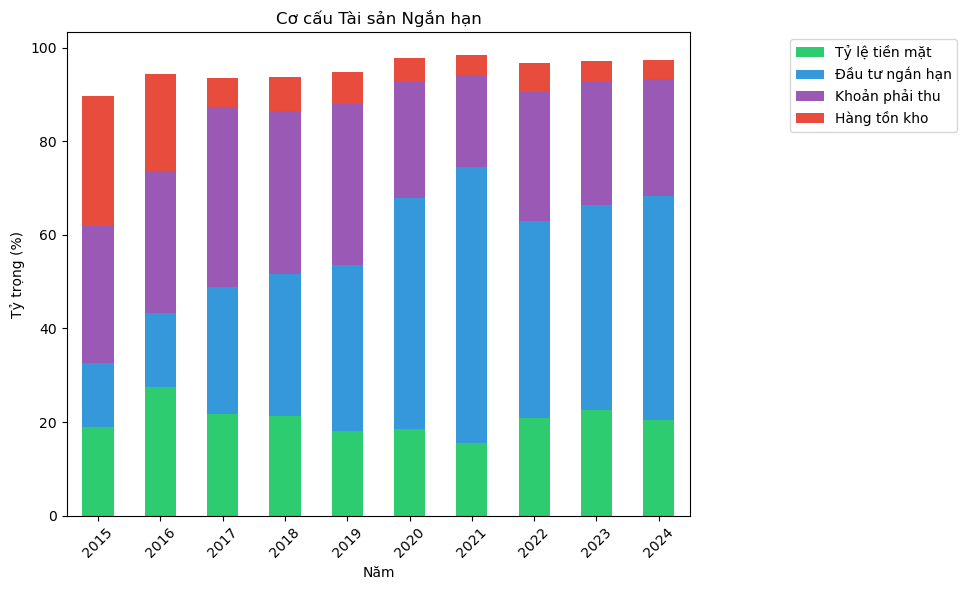

In [848]:
df_structure_refined[[
    "Cash / ST Assets",
    "ST Investments / ST Assets",
    "Receivables / ST Assets",
    "Inventories / ST Assets"
]].plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["#2ecc71", "#3498db", "#9b59b6", "#e74c3c"],
    title="Cơ cấu Tài sản Ngắn hạn"
)
plt.ylabel("Tỷ trọng (%)")
plt.xlabel("Năm")
plt.xticks(rotation=45)
plt.legend(loc='best', fontsize=8, bbox_to_anchor=(1.15, 1))  # Thu gọn chú giải
plt.grid(False)  # Tắt đường lưới
plt.legend(["Tỷ lệ tiền mặt", "Đầu tư ngắn hạn","Khoản phải thu","Hàng tồn kho"], loc='upper left', bbox_to_anchor=(1.15, 1)) 
plt.tight_layout()
plt.show()

In [816]:
cogs = df_income.loc["Giá vốn hàng bán", years]
# Tính hàng tồn kho bình quân
avg_inventories = (inventories.shift(1) + inventories) / 2

# Tính vòng quay hàng tồn kho
inventory_turnover = cogs / -avg_inventories
inventory_turnover = inventory_turnover.fillna(0).round(2)
# Làm tròn và hiển thị
inventory_turnover_rounded = inventory_turnover.round(2)
print("\nChỉ số vòng quay hàng tồn kho:")
print(inventory_turnover_rounded)



Chỉ số vòng quay hàng tồn kho:
2015    0.00
2016    6.33
2017   11.83
2018   12.28
2019   12.96
2020   14.00
2021   15.75
2022   15.46
2023   18.15
2024   22.69
dtype: float64


In [864]:
# Vòng quay khoản phải thu
avg_receivables = (receivables.shift(1) + receivables) / 2
avg_receivables = avg_receivables.fillna(receivables)
receivables_turnover = revenue / avg_receivables
receivables_turnover = receivables_turnover.fillna(0).round(2)   
print("\nChỉ số vòng quay phải thu thuần:")
receivables_turnover


Chỉ số vòng quay phải thu thuần:


2015   6.86
2016   6.49
2017   6.67
2018   3.69
2019   4.28
2020   4.66
2021   5.42
2022   5.72
2023   5.79
2024   5.97
dtype: float64

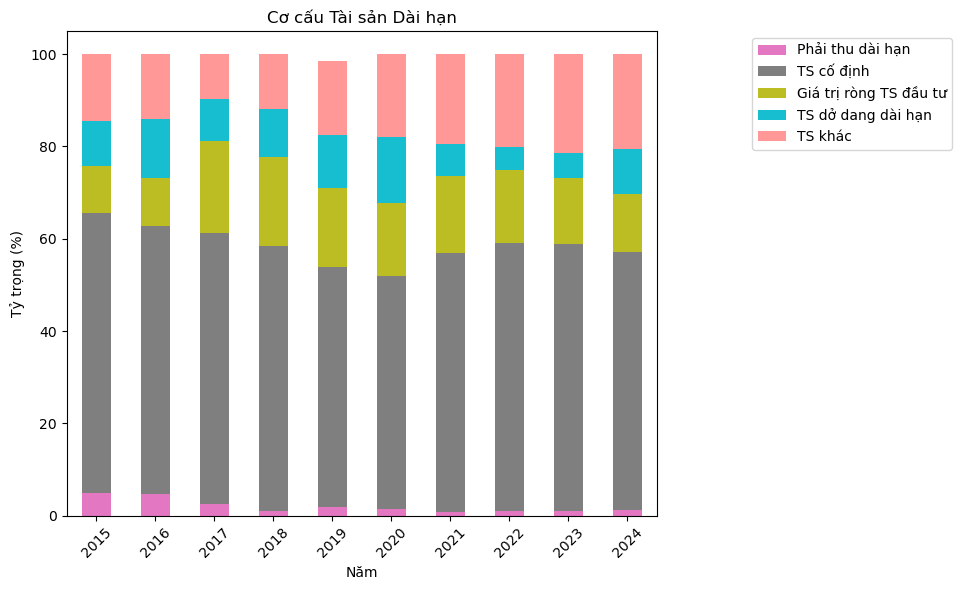

In [852]:
df_structure_refined[[
    "LT Receivables / LT Assets",
    "Fixed Assets / LT Assets",
    "LT Investments / LT Assets",
    "Construction in Progress / LT Assets",
    "Other LT Assets / LT Assets"
]].plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#ff9896"],
    title="Cơ cấu Tài sản Dài hạn"
)
plt.ylabel("Tỷ trọng (%)")
plt.xlabel("Năm")
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.15, 1))  # Di chuyển chú thích ra bên ngoài, bên phải
plt.legend(["Phải thu dài hạn", "TS cố định", "Giá trị ròng TS đầu tư", "TS dở dang dài hạn","TS khác"], loc='upper left', bbox_to_anchor=(1.15, 1)) 
plt.grid(False)  # Tắt đường lưới
plt.tight_layout()
plt.show()

In [820]:
print("Phân tích về cấu trúc tài chính")
funding_gap

Phân tích về cấu trúc tài chính


2015    3,991,454,812,005.00
2016    4,479,007,267,886.00
2017    4,959,593,081,905.00
2018    3,954,937,235,520.00
2019    2,876,919,226,491.00
2020    2,901,222,546,656.00
2021    5,357,266,865,589.00
2022    6,416,549,379,939.00
2023    7,054,078,195,649.00
2024   10,699,758,778,713.00
dtype: float64

In [862]:
# Lấy chỉ số lưu chuyển tiền tệ 
operating_cf = df_cashflow.loc['Lưu chuyển tiền tệ ròng từ các hoạt động sản xuất kinh doanh', years]
investing_cf = df_cashflow.loc['Lưu chuyển tiền thuần từ hoạt động đầu tư', years]
financing_cf = df_cashflow.loc['Lưu chuyển tiền thuần từ hoạt động tài chính', years]

# Combine into a new English-named DataFrame
df_cashflow_summary = pd.DataFrame({
    'Operating Cash Flow': operating_cf,
    'Investing Cash Flow': investing_cf,
    'Financing Cash Flow': financing_cf
})

# Show the result
print("Chỉ số lưu chuyển tiền tệ")
df_cashflow_summary

Chỉ số lưu chuyển tiền tệ


,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow
2015,"1,155,885,029,814.00","-2,900,909,759,661.00","993,451,433,847.00"
2016,"4,311,658,493,292.00","-2,023,807,090,924.00","140,800,835,637.00"
2017,"1,988,183,664,915.00","-2,608,783,604,068.00","-1,912,101,935,833.00"
2018,"3,588,320,092,336.00","-3,696,731,561,429.00","553,479,160,598.00"
2019,"3,898,749,985,785.00","-3,845,068,494,962.00","-514,370,637,050.00"
2020,"6,339,679,033,336.00","-8,144,124,287,084.00","3,037,356,550,037.00"
2021,"5,839,693,554,727.00","-10,412,890,116,331.00","5,364,662,434,403.00"
2022,"5,053,831,756,700.00","5,757,231,937,325.00","-9,773,308,216,323.00"
2023,"9,517,095,698,405.00","-6,548,374,165,711.00","-1,168,383,938,695.00"
2024,"11,703,777,188,868.00","-8,461,812,173,101.00","-2,197,766,125,834.00"


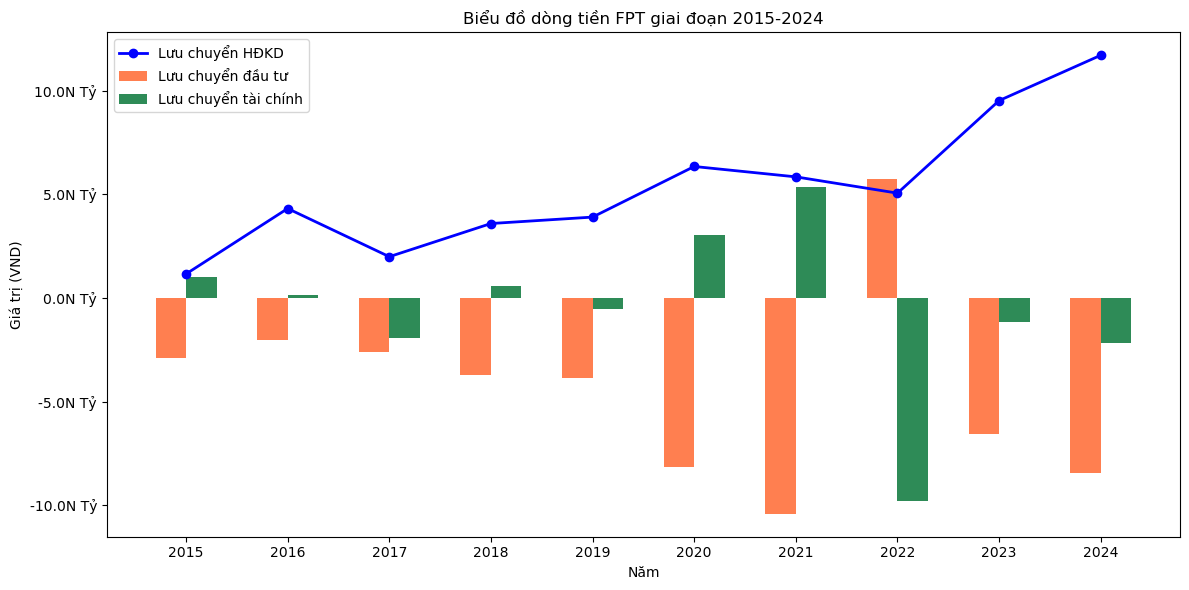

In [854]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# Trục x
x = np.arange(len(df_cashflow_summary.index))
width = 0.3

fig, ax = plt.subplots(figsize=(12,6))

# Vẽ cột: Đầu tư và tài chính
ax.bar(x - width/2, df_cashflow_summary["Investing Cash Flow"], width, label="Lưu chuyển đầu tư", color="coral")
ax.bar(x + width/2, df_cashflow_summary["Financing Cash Flow"], width, label="Lưu chuyển tài chính", color="seagreen")

# Vẽ đường: HĐKD
ax.plot(x, df_cashflow_summary["Operating Cash Flow"], color='blue', marker='o', label="Lưu chuyển HĐKD", linewidth=2)

# Gán nhãn
ax.set_title("Biểu đồ dòng tiền FPT giai đoạn 2015-2024")
ax.set_xlabel("Năm")
ax.set_ylabel("Giá trị (VND)")
ax.set_xticks(x)
ax.set_xticklabels(df_cashflow_summary.index)

# Định dạng trục y: nghìn tỷ
formatter = mtick.FuncFormatter(lambda x, _: f'{x / 1e12:.1f}N Tỷ')
ax.yaxis.set_major_formatter(formatter)

ax.legend()
plt.tight_layout()
plt.show()
